<a href="https://colab.research.google.com/github/gyhfkr/PRAKTIKUN-SOCIAL-NETWORK-ANALYSIS/blob/LABELLING-NRC/Labelling_Dengan_NRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import modul
import pandas as pd
import numpy as np
import re
import re as reg
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_excel("ReviewTerbaru.xlsx", sheet_name='Lokawisata Baturraden')
data

,Nama,Waktu,Rating,Review
0,Sonia Soraya,3 minggu lalu,5 bintang,Bismillah tadi kita ke ke sana.. Pas masuk di...
1,Andy Kristyagita,sebulan lalu,5 bintang,Walaupun sudah berulang kali ke sini semenjak ...
2,Edza Tamara,2 minggu lalu,5 bintang,Suasanan malam hari di lokawisata baturraden n...
3,Abrakadabra,seminggu lalu,5 bintang,"Tempat nya sangat Bersih Dan rapih, butuh stam..."
4,Riko Tampati,sebulan lalu,4 bintang,"Masih masa lebaran, tiket masuk agak mahal 25r..."
...,...,...,...,...
285,bunda popon,3 bulan lalu,5 bintang,"Paket komplit, murah meriah cocok untuk acara ..."
286,petruk,setahun lalu,5 bintang,"Lokasi nya nyaman dan aman, banyak tempat untu..."
287,Eva Meliana,2 tahun lalu,5 bintang,"Tempat nya bagus, sejuk, pemandian nya air nya..."
288,Deandra Almerrafif W.T,sebulan lalu,5 bintang,"View bagus,,, tiket murah, berenang free"


# PREPROCESSING

In [6]:
#Preprocessing
!pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

slangs={'yg':'yang', 'tdk':'tidak', 'pd':'pada', 'mlh':'malah',
 'jgn':'jangan', 'jg':'juga', 'tp':'tapi', 'blkg': 'belakang',
 'dr':'dari', 'klo':'kalo', 'lg':'lagi'}
processed_comments = []
for sentence in data['Review']:

 # Remove all the special characters
 processed_comment = re.sub(r'\W', ' ', str(sentence))

 # Converting to Lowercase
 processed_comment = processed_comment.lower()

 #Remove number
 processed_comment = re.sub(r'\d+', ' ', processed_comment)
 # remove all single characters
 processed_comment = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_comment)

 #remove duplicate character
 pattern=reg.compile(r"(.)\1{1,}",reg.DOTALL)
 processed_comment=pattern.sub(r"\1",processed_comment)
 #Corrected Slang words
 words = processed_comment.split()
 rfrm=[slangs[word] if word in slangs else word for word in words]
 processed_comment= " ".join(rfrm)
 #remove stopword
 factory = StopWordRemoverFactory()
 more_stopword = ['tak', 'jd', 'per', 'nya'] #menambahkan stopword
 stopwords = factory.get_stop_words() + more_stopword
 temp = [t for t in re.findall(r'\b[a-z]+-?[a-z]+\b',processed_comment) if t not in stopwords]
 processed_comment = ' '.join(temp)

 #stemming
 stemmer = StemmerFactory().create_stemmer()
 processed_comment = stemmer.stem(processed_comment)

 # Substituting multiple spaces with single space
 processed_comment = re.sub(r'\s+', ' ', processed_comment, flags=re.I)
 processed_comments.append(processed_comment)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [7]:
# tampilkan output data Preprocessing
processed_comments

['bismilah tadi sana pas masuk suru cuci tangan pakai masker tugas banyak protokol sehat banget deh depan dalem ingetin pake spiker tempat sedia kursi roda sedia pos depan tempat tata banget cakep indah cantik banyak sekali destinasi kunjunganya pesawat monumen monumen mandi air belerang mandi kolem renang depan cocok banget anak belakang prosotan sih cuma ga pancur anya kaya depan mandi air panas banyak cobain atuh cobain sana banyak jual aksesoris jajan ringan sampe berat ain karpet banyak buat tempat duduk penting cakep banyak buat foto luas senang sekali sini sama keluarga buat tonton film main lai banyak sekali jangan lupa bawa uang banyak hehe kalau masuk bayar iya unik sedia rute kursi roda ruang khusus susu waw lengkap banget tadi berangkat pancur naik angkot terus kesana rb orang pas pulang pintu naik ojek rb orang iya nawarin foto langsung jadi kok',
 'walaupun ulang kali sini semenjak kecil rasa bosan unjung area luas bersih hijau nyaman banyak wahana pandang indah cocok cuc

In [9]:
#SAVE HASIL PREPROCESSING
!pip install xlsxwriter
import xlsxwriter

workbook = xlsxwriter.Workbook('hasilpreprocessing.xlsx', {'nan_inf_to_errors': True})
worksheet=workbook.add_worksheet()
row=0
col=0
x=data
hasilakhir=list(zip(x.Nama,x.Waktu,x.Rating,x.Review,processed_comments))
worksheet.write(row, col, "Nama")
worksheet.write(row, col+1, "Waktu")
worksheet.write(row, col+2, "Rating")
worksheet.write(row, col+3, "Review")
worksheet.write(row, col+4, "CleanReview")
row+=1
for a,b,c,d,e in (hasilakhir):
 worksheet.write(row, col, a)
 worksheet.write(row, col+1, b)
 worksheet.write(row, col+2, c)
 worksheet.write(row, col+3, d)
 worksheet.write(row, col+4, e)
 row+=1
workbook.close()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.1 MB/s eta 0:00:00


In [10]:
#JIKA PREPROCESSING SUDAH ADA, MAKA PROSES DIAWALI DARI SINI
dataset = pd.read_excel('hasilpreprocessing.xlsx', sheet_name='Sheet1')
dataset['Number_of_words'] = dataset['CleanReview'].apply(lambda x:len(str(x).split()))
dataset.drop(dataset[dataset["Number_of_words"]<2].index, inplace = True)

# LABELLING MENGGUNAKAN NRC

In [11]:
#LOAD DICTIONARY
dictionary=pd.read_excel('NRC.xlsx', sheet_name='dict')
dictionary

,English (en),Indonesian (id),Javanese (jw),Malay (ms),Sundanese (su),Tagalog (Filipino) (tl),Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,kembali,aback,abak,aback,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,sempoa,abacus,abacus,abacus,abako,0,0,0,0,0,0,0,0,0,1
2,abandon,mengabaikan,nglirwaaken,abaikan,ninggalkeun,abandunahin,0,1,0,0,0,1,0,1,0,0
3,abandoned,ditinggalkan,ditinggal,ditinggalkan,ditinggalkeun,inabandunang,0,1,1,0,0,1,0,1,0,0
4,abandonment,ditinggalkan,abandonment,ditinggalkan,abandonment,pag-abanduna,0,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14188,zone,daerah,zona,Kawasan,wewengkon,zone,0,0,0,0,0,0,0,0,0,0
14189,zoo,kebun binatang,zoo,zoo,kebon sasatoan,zoo,0,0,0,0,0,0,0,0,0,0
14190,zoological,kehewanan,zoological,zoologi,Zoological,zoological,0,0,0,0,0,0,0,0,0,0
14191,zoology,ilmu hewan,zoologi,zoologi,elmu sasatoan,zoology,0,0,0,0,0,0,0,0,0,0


In [14]:
# Load NRC to memory
positive = []
negative = []

# teksbaru = ''
for i in range(1, len(dictionary)):
    kata = dictionary.iloc[i, 1]

    # print(kata)
    if dictionary.iloc[i, 6] == 1:
        positive.append(kata)
    if dictionary.iloc[i, 7] == 1:
        negative.append(kata)

processed_comments = dataset['CleanReview']

# print('Panjang :', len(processed_comments))
datasetangkapos = []
for kalimat in processed_comments:
    baris = []
    baris.append(kalimat)

    # ekstraksi fitur
    f_sentimenpositif = 0
    f_sentimennegatif = 0
    y = kalimat
    for teks in y.split():
        for j in range(0, len(positive) - 1):
            if teks == positive[j]:
                f_sentimenpositif += 1
        for j in range(0, len(negative) - 1):
            if teks == negative[j]:
                f_sentimennegatif += 1

    # l_sentimen = f_sentimenpositif - f_sentimennegatif
    l_sentimenne = 0
    l_sentimenp = 0
    l_sentimenn = 0

    # menentukan label
    if f_sentimenpositif - f_sentimennegatif == 0:
        l_sentimenne = 0
    else:
        if f_sentimenpositif - f_sentimennegatif > 0:
            l_sentimenp = 1
        else:
            l_sentimenn = -1
    baris.append(l_sentimenp)  # dataset(3)
    baris.append(l_sentimenn)  # dataset(3)
    datasetangkapos.append(baris)

In [15]:
dataset_labelled=pd.DataFrame(datasetangkapos, columns=['Review','Positif','Negatif'])
dataset_labelled

,Review,Positif,Negatif
0,bismilah tadi sana pas masuk suru cuci tangan ...,1,0
1,walaupun ulang kali sini semenjak kecil rasa b...,1,0
2,suasanan malam hari lokawisata baturaden nih s...,1,0
3,tempat sangat bersih rapih butuh stamina utama...,1,0
4,masa lebaran tiket masuk mahal rb sangat ramai...,0,-1
...,...,...,...
284,paket komplit murah riah cocok acara keluarga,1,0
285,lokasi nyaman aman banyak tempat berswaphoto b...,1,0
286,tempat bagus sejuk mandi air dingin hangat fla...,1,0
287,view bagus tiket murah renang fre,1,0


In [16]:
dataset_labelled.to_excel("output_labelling.xlsx", index=False)

# SENTIMEN ANALYSIS BASED STATISTIC

In [17]:
data_berlabel=pd.read_excel("output_labelling.xlsx")
data_berlabel

,Review,Positif,Negatif
0,bismilah tadi sana pas masuk suru cuci tangan ...,1,0
1,walaupun ulang kali sini semenjak kecil rasa b...,1,0
2,suasanan malam hari lokawisata baturaden nih s...,1,0
3,tempat sangat bersih rapih butuh stamina utama...,1,0
4,masa lebaran tiket masuk mahal rb sangat ramai...,0,-1
...,...,...,...
284,paket komplit murah riah cocok acara keluarga,1,0
285,lokasi nyaman aman banyak tempat berswaphoto b...,1,0
286,tempat bagus sejuk mandi air dingin hangat fla...,1,0
287,view bagus tiket murah renang fre,1,0


In [18]:
positif=data_berlabel['Positif'].sum()
negatif=data_berlabel['Negatif'].sum()*-1
print('Sentimen Positif=',positif)
print('Sentimen Negatif=',negatif)

Sentimen Positif= 250
Sentimen Negatif= 18


[250, 18]


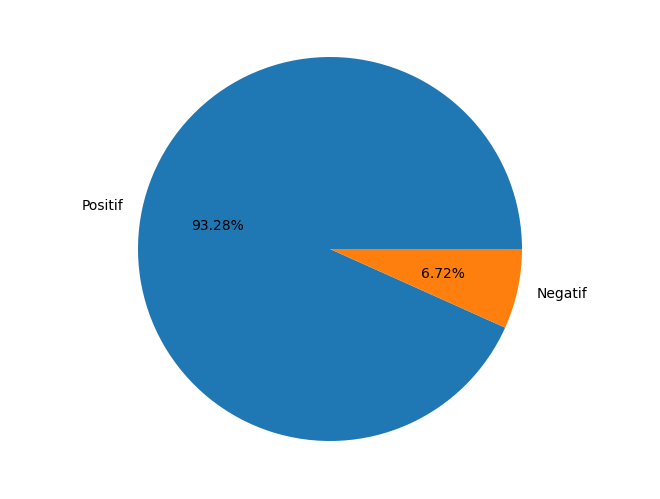

In [19]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
sentimen=['Positif', 'Negatif']
jumlah=[positif,negatif]
print(jumlah)
ax.pie(jumlah,labels=sentimen, autopct='%1.2f%%')
plt.show()